## 1. Environment setup

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier

## 2. Data exploration 

In [39]:
# Load the CSV file into a DataFrame
df = pd.read_csv(r'F:\Portfolios\6 - Machine Predictive Maintenance Classification\predictive_maintenance.csv')

# Display the first few rows
print(df.head())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  


In [41]:
# Check for missing value
print(df.isnull().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


In [43]:
# Data exploration 
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
None
               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930

## 3. Data Pre-processing

In [49]:
# Drop Unnecessary Columns
df = df.drop(['UDI', 'Product ID', 'Failure Type'], axis=1)

In [51]:
# Encode Categorical Variables
df = pd.get_dummies(df, drop_first=True)

In [57]:
# Rename the 'Target' column to 'Machine failure'
df = df.rename(columns={'Target': 'Machine failure'})

# Verify the column names
print(df.columns)

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'Type_L', 'Type_M'],
      dtype='object')


In [59]:
# Split Data into Features (X) and Target (y)
X = df.drop('Machine failure', axis=1)  # Features
y = df['Machine failure']  # Target

# Check the shapes of X and y
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (10000, 7)
Target shape: (10000,)


In [61]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Model Building

In [64]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
# Model evaluation
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9845
Confusion Matrix:
 [[1934    5]
 [  26   35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.88      0.57      0.69        61

    accuracy                           0.98      2000
   macro avg       0.93      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000



## 5. Model Improvement with XGBoost

In [71]:
# Train an XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

ValueError: feature_names must be string, and may not contain [, ] or <

### #error correction

In [78]:
import re

# Clean column names by removing special characters
df.columns = [re.sub(r'[\[\]<>]', '', col) for col in df.columns]

# Verify the cleaned column names
print(df.columns)

Index(['Air temperature K', 'Process temperature K', 'Rotational speed rpm',
       'Torque Nm', 'Tool wear min', 'Machine failure', 'Type_L', 'Type_M'],
      dtype='object')


In [97]:
from xgboost import XGBClassifier

# Split Data into Features (X) and Target (y)
X = df.drop('Machine failure', axis=1)  # Features
y = df['Machine failure']  # Target

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [99]:
# Check Feature Importance
feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))

Torque Nm                0.240612
Rotational speed rpm     0.160085
Air temperature K        0.158282
Tool wear min            0.150475
Type_L                   0.126197
Process temperature K    0.112986
Type_M                   0.051362
dtype: float32


In [101]:
# Evaluate the Model
y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.985
Confusion Matrix:
 [[1930    9]
 [  21   40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.82      0.66      0.73        61

    accuracy                           0.98      2000
   macro avg       0.90      0.83      0.86      2000
weighted avg       0.98      0.98      0.98      2000



## 6. Result Visualization

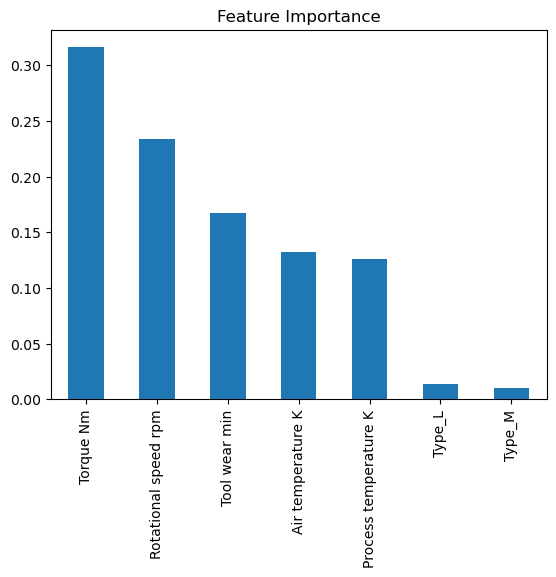

In [88]:
# Feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')
plt.show()

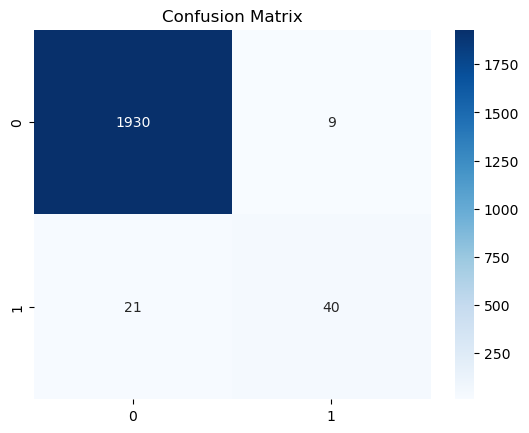

In [90]:
# COnfusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## 7. Import data into PowerBI

In [109]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Generate predictions
y_pred_xgb = xgb_model.predict(X_test)

In [111]:
# Export model predictions
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})
results.to_csv('predictive_maintenance_results.csv', index=False)

# Export feature importance
feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
feature_importances.to_csv('feature_importance.csv', index=True)

# Export confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
conf_matrix_df.to_csv('confusion_matrix.csv', index=True)

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

# Create a DataFrame for metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [accuracy, precision, recall, f1]
})

# Export metrics to a CSV file
metrics_df.to_csv('model_metrics.csv', index=False)

In [115]:
# Add sample index to the results DataFrame
results = pd.DataFrame({
    'Sample Index': y_test.index,  # Add the index of y_test
    'Actual': y_test,
    'Predicted': y_pred_xgb
})

# Export results to a CSV file
results.to_csv('predictive_maintenance_results.csv', index=False)